# Boosting Algorithms

Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective.  A sincere understanding of GBM here should give you much needed confidence to deal with such critical issues.

In this session, I’ll disclose the science behind using GBM using Python. And, most important, how you can tune its parameters and obtain incredible results.

Table of Contents

    How Boosting Works?
    Understanding GBM Parameters
    Tuning Parameters (with Example)

 
1. How Boosting Works ?

Boosting is a sequential technique which works on the principle of ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. This technique is followed for a classification problem while a similar technique is used for regression.

Let’s understand it visually:
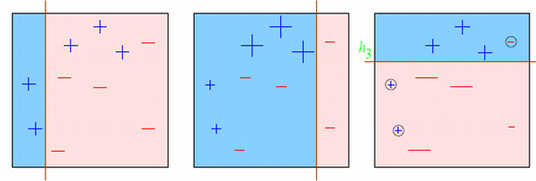

Observations:

    Box 1: Output of First Weak Learner (From the left)
        Initially all points have same weight (denoted by their size).
        The decision boundary predicts 2 +ve and 5 -ve points correctly.
    Box 2: Output of Second Weak Learner
        The points classified correctly in box 1 are given a lower weight and vice versa.
        The model focuses on high weight points now and classifies them correctly. But, others are misclassified now.

Similar trend can be seen in box 3 as well. This continues for many iterations. In the end, all models are given a weight depending on their accuracy and a consolidated result is generated.

2. GBM Parameters

The overall parameters can be divided into 3 categories:

    Tree-Specific Parameters: These affect each individual tree in the model.
    Boosting Parameters: These affect the boosting operation in the model.
    Miscellaneous Parameters: Other parameters for overall functioning.

I’ll start with tree-specific parameters. First, lets look at the general structure of a decision tree:
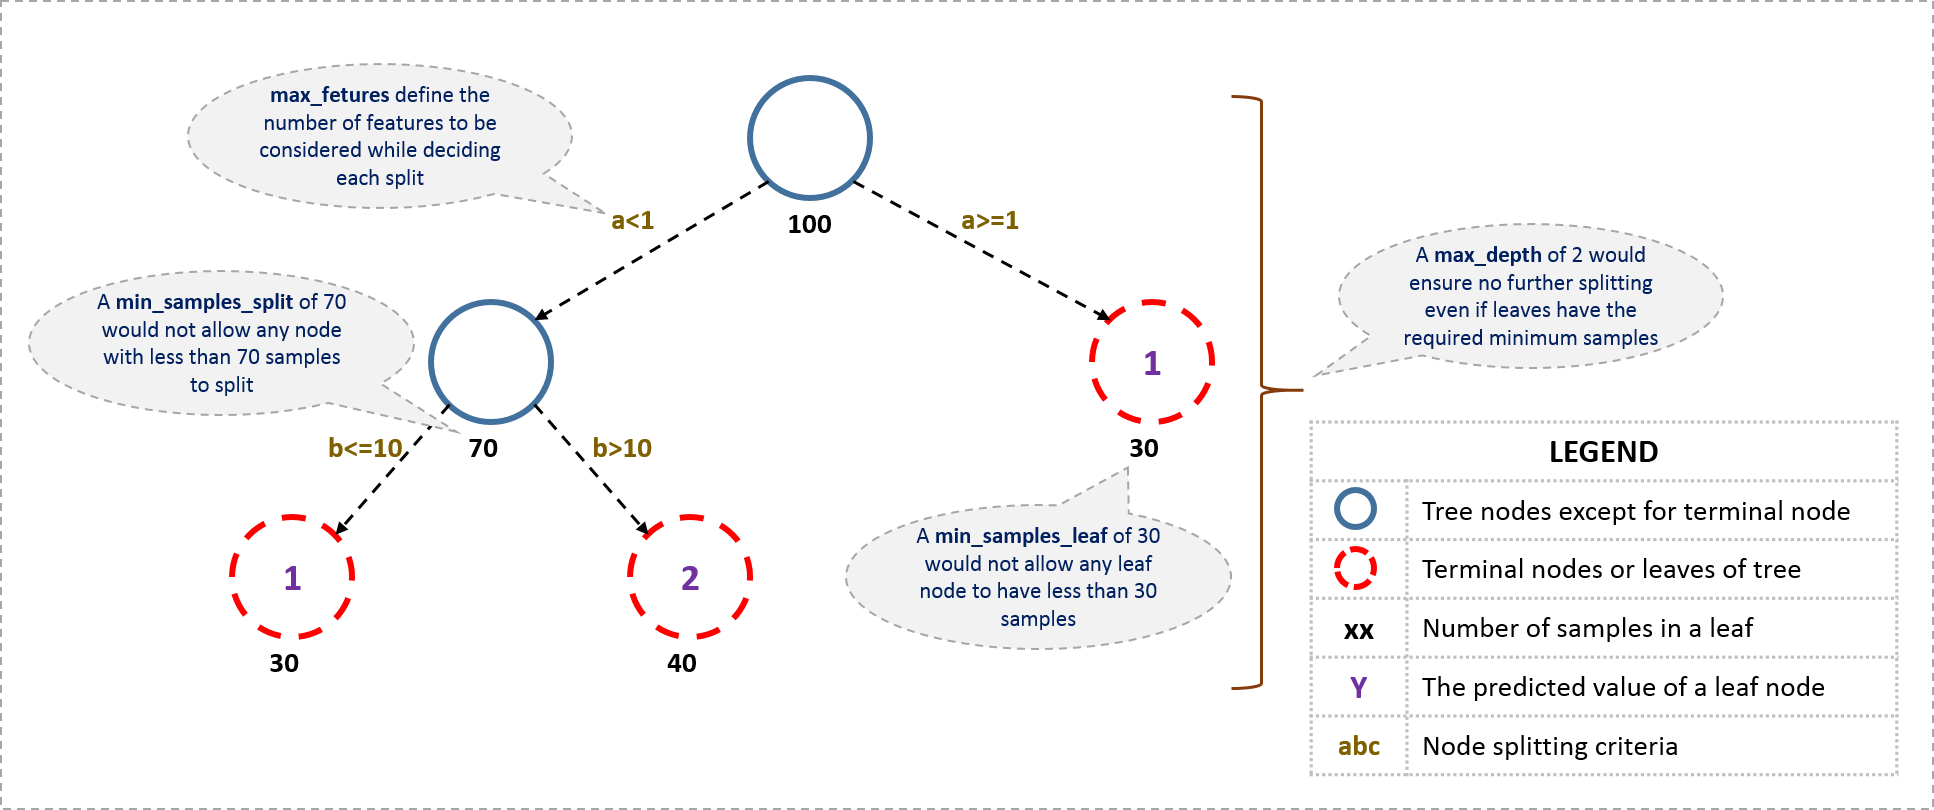 

The parameters used for defining a tree are further explained below. Note that I’m using scikit-learn (python) specific terminologies here which might be different in other software packages like R. But the idea remains the same.

- min_samples_split
        Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting. 
        Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
        Too high values can lead to under-fitting hence, it should be tuned using CV.
- min_samples_leaf
        Defines the minimum samples (or observations) required in a terminal node or leaf.
        Used to control over-fitting similar to min_samples_split.
        Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.
- min_weight_fraction_leaf
        Similar to min_samples_leaf but defined as a fraction of the total number of observations instead of an integer.
        Only one of #2 and #3 should be defined.
- max_depth
        The maximum depth of a tree.
        Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
        Should be tuned using CV.
- max_leaf_nodes
        The maximum number of terminal nodes or leaves in a tree.
        Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
        If this is defined, GBM will ignore max_depth.
- max_features
        The number of features to consider while searching for a best split. These will be randomly selected.
        As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
        Higher values can lead to over-fitting but depends on case to case.

Before moving on to other parameters, lets see the overall pseudo-code of the GBM algorithm for 2 classes:
1. Initialize the outcome
2. Iterate from 1 to total number of trees
  - 2.1 Update the weights for targets based on previous run (higher for the ones mis-classified)
  - 2.2 Fit the model on selected subsample of data
  - 2.3 Make predictions on the full set of observations
  - 2.4 Update the output with current results taking into account the learning rate
3. Return the final output.

This is an extremely simplified (probably naive) explanation of GBM’s working. The parameters which we have considered so far will affect step 2.2, i.e. model building. Lets consider another set of parameters for managing boosting:

- learning_rate
        This determines the impact of each tree on the final outcome (step 2.4). GBM works by starting with an initial estimate which is updated using the output of each tree. The learning parameter controls the magnitude of this change in the estimates.
        Lower values are generally preferred as they make the model robust to the specific characteristics of tree and thus allowing it to generalize well.
        Lower values would require higher number of trees to model all the relations and will be computationally expensive.
- n_estimators
        The number of sequential trees to be modeled (step 2)
        Though GBM is fairly robust at higher number of trees but it can still overfit at a point. Hence, this should be tuned using CV for a particular learning rate.
- subsample
        The fraction of observations to be selected for each tree. Selection is done by random sampling.
        Values slightly less than 1 make the model robust by reducing the variance.
        Typical values ~0.8 generally work fine but can be fine-tuned further.

Apart from these, there are certain miscellaneous parameters which affect overall functionality:

- loss:  
    It refers to the loss function to be minimized in each split.
    It can have various values for classification and regression case. Generally the default values work fine. Other values should be chosen only if you understand their impact on the model.

- init
    This affects initialization of the output.
    This can be used if we have made another model whose outcome is to be used as the initial estimates for GBM.

- random_state
    The random number seed so that same random numbers are generated every time.
    If we don’t fix the random number, then we’ll have different outcomes for subsequent runs on the same parameters and it becomes difficult to compare models.
    It can potentially result in overfitting to a particular random sample selected. We can try running models for different random samples, which is computationally expensive and generally not used.

- verbose
    The type of output to be printed when the model fits. The different values can be:
        0: no output generated (default)
        1: output generated for trees in certain intervals
        >1: output generated for all trees
- warm_start
        This parameter has an interesting application and can help a lot if used judicially.
        Using this, we can fit additional trees on previous fits of a model. It can save a lot of time and you should explore this option for advanced applications
- presort 
        Select whether to presort data for faster splits.
        It makes the selection automatically by default but it can be changed if needed.
